In [1]:
from scipy import *
from pylab import *
import numpy as np
from scipy.interpolate import interp1d
from IPython.display import Image

h=0.7
k_arr = logspace(-2,1.5,100)

####################################################
### test plots for neutrino batch fiducial model ###
####################################################

####### linear Pmatter from camb
kcamb1, Pcamb1 = np.loadtxt('camb/camb_mnv0.10000_om0.30000_As2.1000_matterpow_0.dat').T
kcamb0, Pcamb0 = np.loadtxt('camb/camb_mnv0.00000_om0.30000_As2.1000_matterpow_0.dat').T

####### bird halofit
kbird1, Pbird1 = np.loadtxt('camb-fidu/camb_mnv0.10000_om0.30000_As2.1000-bird_matterpow_0.dat').T
kbird0, Pbird0 = np.loadtxt('camb-fidu/camb_mnv0.00000_om0.30000_As2.1000-bird_matterpow_0.dat').T

####### takahashi halofit
ktaka1, Ptaka1 = np.loadtxt('camb-fidu/camb_mnv0.10000_om0.30000_As2.1000-halofit_matterpow_0.dat').T
ktaka0, Ptaka0 = np.loadtxt('camb-fidu/camb_mnv0.00000_om0.30000_As2.1000-halofit_matterpow_0.dat').T

####### n-body
knb0, Pnb0, Nnb0 = np.loadtxt('matterpower/mnv0.00000_om0.30000_As2.1000-PK-DM-snapshot_050_radiation').T
knb1, Pnb1, Nnb1 = np.loadtxt('matterpower/mnv0.10000_om0.30000_As2.1000-PK-DM-snapshot_050').T
knb1_z3, Pnb1_z3, Nnb1_z3 = np.loadtxt('matterpower/mnv0.10000_om0.30000_As2.1000-PK-DM-snapshot_000').T

###### P_neutrino from n-body run for the Mnv = 0.1 eV run (fiducial)
knu_z0, Pnu_z0 = np.loadtxt('matterpower/powerspec_nu_050.txt',skiprows=2).T
knu_z3, Pnu_z3 = np.loadtxt('matterpower/powerspec_nu_000.txt',skiprows=2).T
knu_z0 *= 1e3
Pnu_z0 *= (2*pi)**3*1e-9
knu_z3 *= 1e3
Pnu_z3 *= (2*pi)**3*1e-9

###### translate the power spectrum from Gen-pk to actual units (using gadget unit)
Boxsize = 256.0 ## unit Mpc/h
knb0 *= 2*pi/Boxsize
Pnb0 *= Boxsize**3
Pnb1 *= Boxsize**3
Pnb1_z3 *= Boxsize**3

###### bin the power spectra for smoother curve
binsize = 5
k0, k1 = knb0[0::binsize][:-1], knb0[binsize-1::binsize]
knb_bin =0.5*(k0+k1)

bin_array = lambda P, Nmodes: average(P [:-(len(P)%binsize)].reshape(-1, binsize), 
            weights=Nmodes[:-(len(P)%binsize)].reshape(-1, binsize)/sum(Nmodes), 
            axis=1)

Pnb0_bin = bin_array(Pnb0, Nnb0)
Pnb1_bin = bin_array(Pnb1, Nnb1)
Pnb1_z3_bin = bin_array(Pnb1_z3, Nnb1_z3)

###### interpolate to have the same bins for camb output Pmatter
Pcamb1_interp = interp1d(kcamb1, Pcamb1)(k_arr)
Pcamb0_interp = interp1d(kcamb0, Pcamb0)(k_arr)
Pbird1_interp = interp1d(kbird1, Pbird1)(k_arr)
Pbird0_interp = interp1d(kbird0, Pbird0)(k_arr)
Ptaka1_interp = interp1d(ktaka1, Ptaka1)(k_arr)
Ptaka0_interp = interp1d(ktaka0, Ptaka0)(k_arr)

Pnu_z0_interp = interp1d(knu_z0, Pnu_z0, fill_value="extrapolate")(knb_bin)
Pnu_z3_interp = interp1d(knu_z3, Pnu_z3, fill_value="extrapolate")(knb_bin)

###### P_matter of DM+bary, or "no neutrino" (nn)
kTF, Ttot, Tnn, Tnu = loadtxt('camb/camb_mnv0.10000_om0.30000_As2.1000_transfer_0.dat').T[[0,6,7,5]]
ratio_nn = interp1d(kTF, (Tnn/Ttot)**2)(k_arr)
ratio_nu = interp1d(kTF, (Tnu/Ttot)**2)(k_arr)
Pnn_z0 = Pcamb1_interp * ratio_nn

kcamb1_z3, Pcamb1_z3 = np.loadtxt('camb-fidu/camb_mnv0.10000_om0.30000_As2.1000-linear_matterpow_3.dat').T
Pcamb1_z3_interp = interp1d(kcamb1_z3, Pcamb1_z3, fill_value="extrapolate")(k_arr)
kTF_z3, Ttot_z3, Tnn_z3, Tnu_z3 = loadtxt('camb-fidu/camb_mnv0.10000_om0.30000_As2.1000-linear_transfer_3.dat').T[[0,6,7,5]]
ratio_nn_z3 = interp1d(kTF_z3, (Tnn_z3/Ttot_z3)**2)(k_arr)
Pnn_z3 = Pcamb1_z3_interp * ratio_nn_z3
ratio_nu_z3 = interp1d(kTF_z3, (Tnu_z3/Ttot_z3)**2)(k_arr)

### ((Omega_nu P^{1/2}_nu + (Omega_0 - Omega_nu) P^{1/2}_{cdm+bar})/(Omega0))**2
omnu = 0.00108/0.7**2
omc = 0.3-omnu
Ptot_z0 = ((omnu*(Pnu_z0_interp)**0.5+omc*Pnb1_bin**0.5)/0.3)**2
Ptot_z3 = ((omnu*(Pnu_z3_interp)**0.5+omc*Pnb1_z3_bin**0.5)/0.3)**2

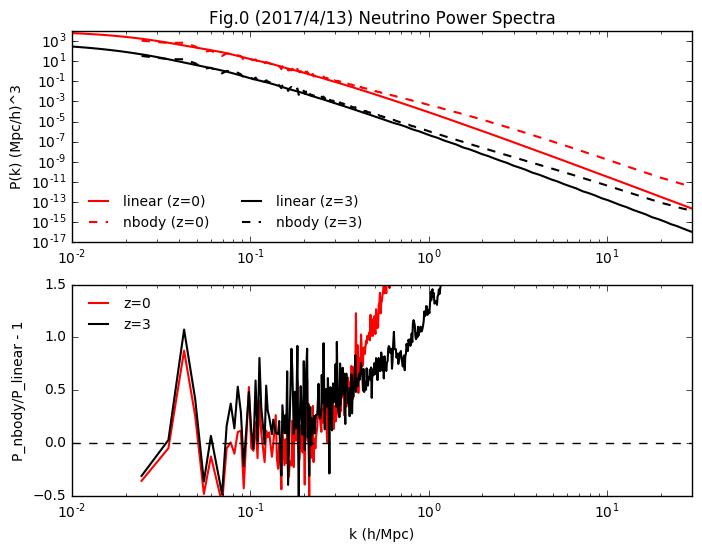

In [11]:
f=figure(figsize=(8,6))
ax=f.add_subplot(211)
ax2=f.add_subplot(212)

ax.plot(k_arr, ratio_nu*Pcamb1_interp, 'r-',lw=1.5,label='linear (z=0)')
ax.plot(knu_z0, Pnu_z0,'r--',lw=1.5,label='nbody (z=0)')

ax.plot(k_arr, ratio_nu_z3*Pcamb1_z3_interp, 'k-',lw=1.5,label='linear (z=3)')
ax.plot(knu_z3, Pnu_z3, 'k--',lw=1.5,label='nbody (z=3)')

ax.set_ylabel('P(k) (Mpc/h)^3')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim(1e-2, 30)
#ax.set_ylim(0.1, 1e5)
ax.set_title('Fig.0 (2017/4/13) Neutrino Power Spectra')
ax.legend(frameon=0,loc=3,fontsize=10,ncol=2)

Pnu1_z0_bin = interp1d(k_arr, ratio_nu*Pcamb1_interp, fill_value="extrapolate")(knu_z0)
Pnu1_z3_bin = interp1d(k_arr, ratio_nu_z3*Pcamb1_z3_interp, fill_value="extrapolate")(knu_z3)

ax2.plot(knu_z0, Pnu_z0/Pnu1_z0_bin-1, 'r-',lw=1.5,label='z=0')
ax2.plot(knu_z3, Pnu_z3/Pnu1_z3_bin-1, 'k-',lw=1.5,label='z=3')

ax2.set_xlabel('k (h/Mpc)')
ax2.set_ylabel('P_nbody/P_linear - 1')
ax2.set_xscale('log')
ax2.set_xlim(1e-2, 30)
ax2.set_ylim(-0.5, 1.5)
ax2.legend(frameon=0,loc=0,fontsize=10,ncol=1)
ax2.plot([1e-2, 30],[0,0],'k--')
show()

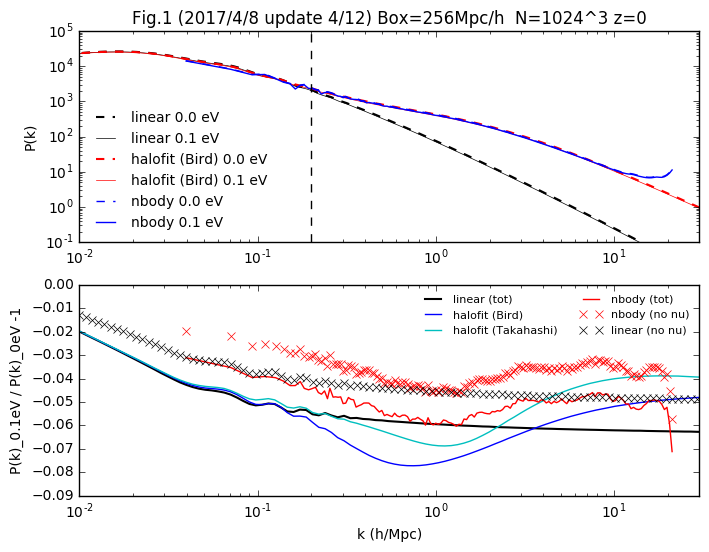

In [12]:
f=figure(figsize=(8,6))
ax=f.add_subplot(211)
ax2=f.add_subplot(212)

ax.plot(kcamb0, Pcamb0, 'k--',lw=1.5, label='linear 0.0 eV')
ax.plot(kcamb1, Pcamb1, 'k-', lw=0.5, label='linear 0.1 eV')

ax.plot(kbird0, Pbird0, 'r--',lw=1.5, label='halofit (Bird) 0.0 eV')
ax.plot(kbird1, Pbird1, 'r-', lw=0.5, label='halofit (Bird) 0.1 eV')

ax.plot(knb_bin, Pnb0_bin, 'b--', lw=1,label='nbody 0.0 eV')
ax.plot(knb_bin, Pnb1_bin, 'b-',  lw=1,label='nbody 0.1 eV')

ax.plot((0.2,0.2), (0.1,1e5),'k--')
ax.set_ylabel('P(k)')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim(1e-2, 30)
ax.set_ylim(0.1, 1e5)
ax.set_title('Fig.1 (2017/4/8 update 4/12) Box=256Mpc/h  N=1024^3 z=0')
ax.legend(frameon=0,loc=3,fontsize=10)


ax2.plot(k_arr,Pcamb1_interp/Pcamb0_interp-1,'k-',lw=1.5, label='linear (tot)')
ax2.plot(k_arr,Pbird1_interp/Pbird0_interp-1,'b-',lw=1.0, label='halofit (Bird)')
ax2.plot(k_arr,Ptaka1_interp/Ptaka0_interp-1,'c-',lw=1.0, label='halofit (Takahashi)')
ax2.plot(knb_bin,Ptot_z0/Pnb0_bin-1,'r-',lw=1.0, label='nbody (tot)')

ax2.plot(knb_bin,Pnb1_bin/Pnb0_bin-1,'rx',lw=1.0, label='nbody (no nu)')
ax2.plot(k_arr, Pnn_z0/Pcamb0_interp-1,'kx',lw=1.0, label='linear (no nu)')


ax2.legend(frameon=0,fontsize=8,ncol=2)
ax2.set_xscale('log')
ax2.set_xlim(1e-2, 30)
ax2.set_ylim(-0.09,0.0)
ax2.set_xlabel('k (h/Mpc)')
ax2.set_ylabel('P(k)_0.1eV / P(k)_0eV -1')
show()

######## note on some test results:
######## the lower power is due to nu mass splitting
######## nor it's due to the definition in omega_m = 1-omega_lambda

# Fig.4 in Ali-Haimoud & Bird 2013

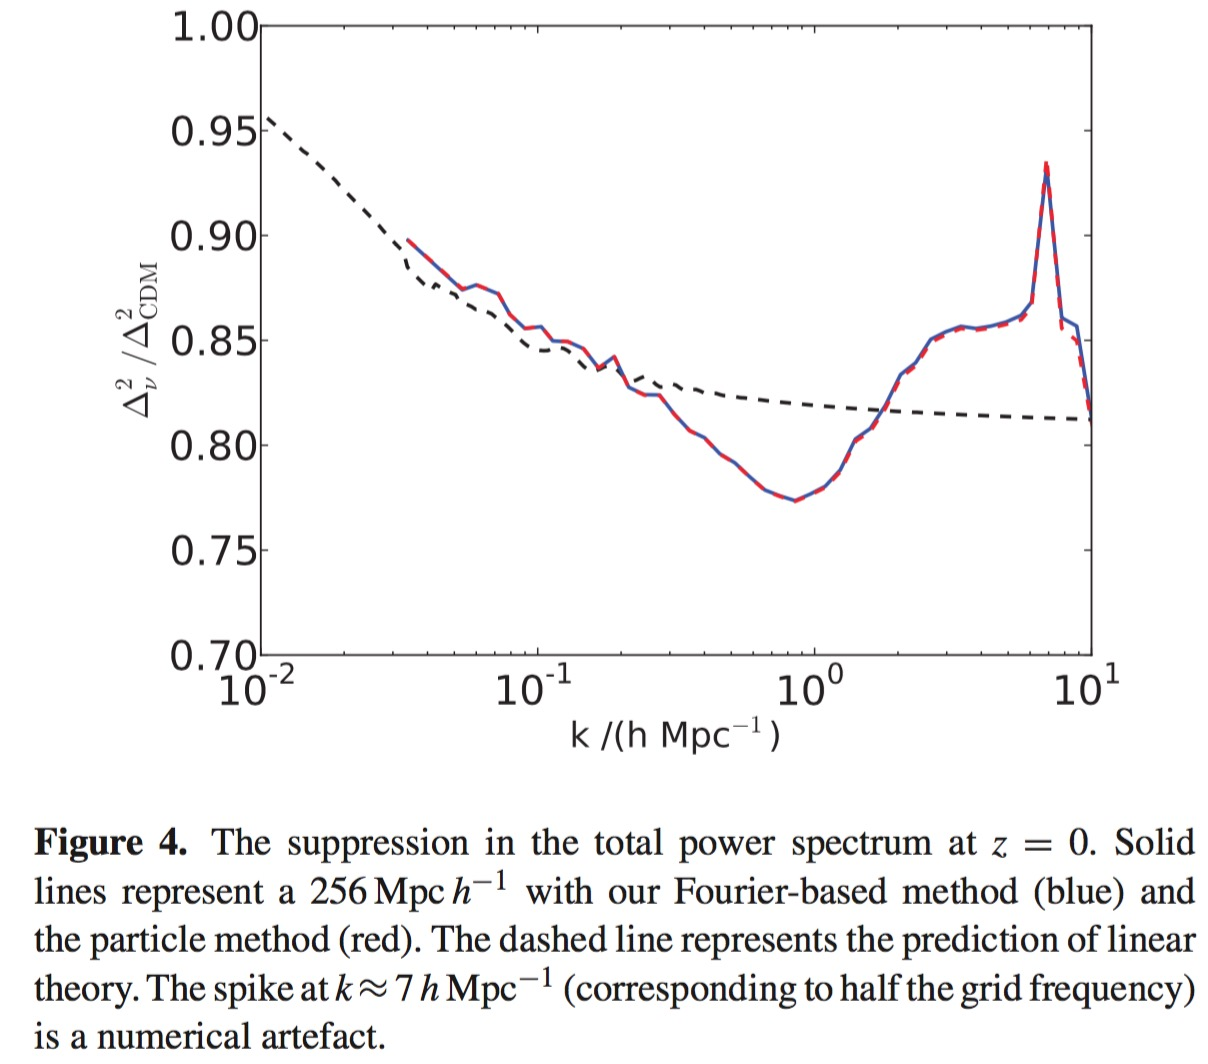

In [13]:
Image("plots/AB13fig4.jpg",width=450)

In [14]:
############ check IC and higher redshift snapshots ##########
kcamb0_z99, Pcamb0_z99 = np.loadtxt('camb/camb_mnv0.00000_om0.30000_As2.1000_matterpow_99.dat').T
kcamb1_z99, Pcamb1_z99 = np.loadtxt('camb/camb_mnv0.10000_om0.30000_As2.1000_matterpow_99.dat').T

kcamb0_z03, Pcamb0_z03 = np.loadtxt('camb-fidu/camb_mnv0.00000_om0.30000_As2.1000-linear_matterpow_3.dat').T
kcamb1_z03, Pcamb1_z03 = np.loadtxt('camb-fidu/camb_mnv0.10000_om0.30000_As2.1000-linear_matterpow_3.dat').T

knb1_z99, Pnb1_z99, _N = np.loadtxt('matterpower/mnv0.10000_om0.30000_As2.1000-PK-DM-ICs').T
knb1_z03, Pnb1_z03, _N = np.loadtxt('matterpower/mnv0.10000_om0.30000_As2.1000-PK-DM-snapshot_000').T

knb0_z99, Pnb0_z99, _N = np.loadtxt('matterpower/mnv0.00000_om0.30000_As2.1000-PK-DM-ICs').T
knb0_z03, Pnb0_z03, _N = np.loadtxt('matterpower/mnv0.00000_om0.30000_As2.1000-PK-DM-snapshot_000_radiation').T

#kgadget_512Mpc, Pgadget_z99_512Mpc, Nmodes_512Mpc = np.loadtxt('matterpower/mnv0.10000_om0.30000_As2.1000-PK-DM-ICs-512Mpc').T
#kgadget0_512Mpc, Pgadget0_z99_512Mpc, Nmodes_512Mpc = np.loadtxt('matterpower/mnv0.00000_om0.30000_As2.1000-PK-DM-ICs-512Mpc').T

Pnb1_z99 *= Boxsize**3
Pnb1_z03 *= Boxsize**3
Pnb0_z99 *= Boxsize**3
Pnb0_z03 *= Boxsize**3

Pnb1_z03_bin = bin_array(Pnb1_z03, _N)
Pnb1_z99_bin = bin_array(Pnb1_z99, _N)
Pnb0_z03_bin = bin_array(Pnb0_z03, _N)
Pnb0_z99_bin = bin_array(Pnb0_z99, _N)

########### get P_nonu at z=99, 3
kcamb1_z99, Pcamb1_z99 = np.loadtxt('camb-fidu/camb_mnv0.10000_om0.30000_As2.1000-linear_matterpow_99.dat').T
Pcamb1_z99_interp = interp1d(kcamb1_z99, Pcamb1_z99, fill_value="extrapolate")(knb_bin)
kTF_z99, Ttot_z99, Tnn_z99, Tnu_z99 = loadtxt('camb-fidu/camb_mnv0.10000_om0.30000_As2.1000-linear_transfer_99.dat').T[[0,6,7,5]]
ratio_nn_z99 = interp1d(kTF_z99, (Tnn_z99/Ttot_z99)**2)(knb_bin)
Pnn_z99 = Pcamb1_z99_interp * ratio_nn_z99

Pcamb1_z03_bin = interp1d(kcamb1_z3, Pcamb1_z3, fill_value="extrapolate")(knb_bin)
Pnn_z03 = Pcamb1_z03_bin * interp1d(kTF_z3, (Tnn_z3/Ttot_z3)**2)(knb_bin)

########## get P_matter for 0eV at z=99,3
Pcamb0_z03_bin = interp1d(kcamb0_z03, Pcamb0_z03, fill_value="extrapolate")(knb_bin)
Pcamb0_z99_bin = interp1d(kcamb0_z99, Pcamb0_z99, fill_value="extrapolate")(knb_bin)

#correct_nonu=1
#if correct_nonu:
#    P_z99_out *= ratio_nonu99
#    P_z3_out *= ratio_nonu3
#    P_z99_512Mpc_out *=ratio_nonu99_512Mpc

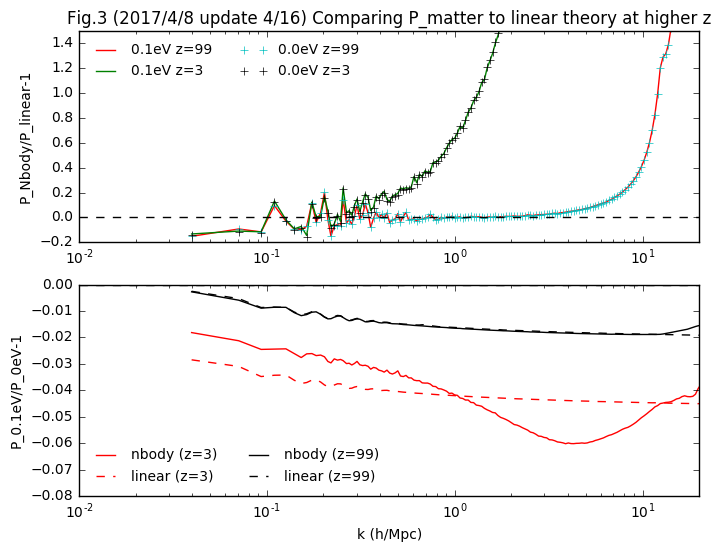

In [15]:
f=figure(figsize=(8,6))
ax=f.add_subplot(211)
ax2=f.add_subplot(212)

ax.plot(knb_bin, Pnb1_z99_bin/Pnn_z99-1,'r-',label='0.1eV z=99')
ax.plot(knb_bin, Pnb1_z03_bin/Pnn_z03-1,'g-',label='0.1eV z=3')

ax.plot(knb_bin, Pnb0_z99_bin/Pcamb0_z99_bin-1,'c+',label='0.0eV z=99')
ax.plot(knb_bin, Pnb0_z03_bin/Pcamb0_z03_bin-1,'k+',label='0.0eV z=3')

ax2.plot(knb_bin, Pnb1_z03_bin/Pnb0_z03_bin-1,'r-',label='nbody (z=3)')
ax2.plot(knb_bin, Pnn_z03/Pcamb0_z03_bin-1,'r--',label='linear (z=3)')

ax2.plot(knb_bin, Pnb1_z99_bin/Pnb0_z99_bin-1,'k-',label='nbody (z=99)')
ax2.plot(knb_bin, Pnn_z99/Pcamb0_z99_bin-1,'k--',label='linear (z=99)')

ax.set_ylim(-0.2,1.5)
ax.set_ylabel('P_Nbody/P_linear-1')
ax2.set_ylim(-0.08,0)
ax2.set_ylabel('P_0.1eV/P_0eV-1')
ax2.set_xlabel('k (h/Mpc)')
for iax in [ax,ax2]:
    iax.legend(fontsize=10,frameon=0,loc=0, ncol=2)
    iax.plot([1e-2, 20],[0,0],'k--')
    iax.set_xscale('log')    
    iax.set_xlim(1e-2,20)    
ax.set_title("Fig.3 (2017/4/8 update 4/16) Comparing P_matter to linear theory at higher z")
show()

Model 1, mnv0.06522_om0.28205_As1.8826
Model 2, mnv0.06271_om0.38154_As2.2004
Model 3, mnv0.10000_om0.30000_As2.1000
Model 4, mnv0.00000_om0.30000_As2.1000


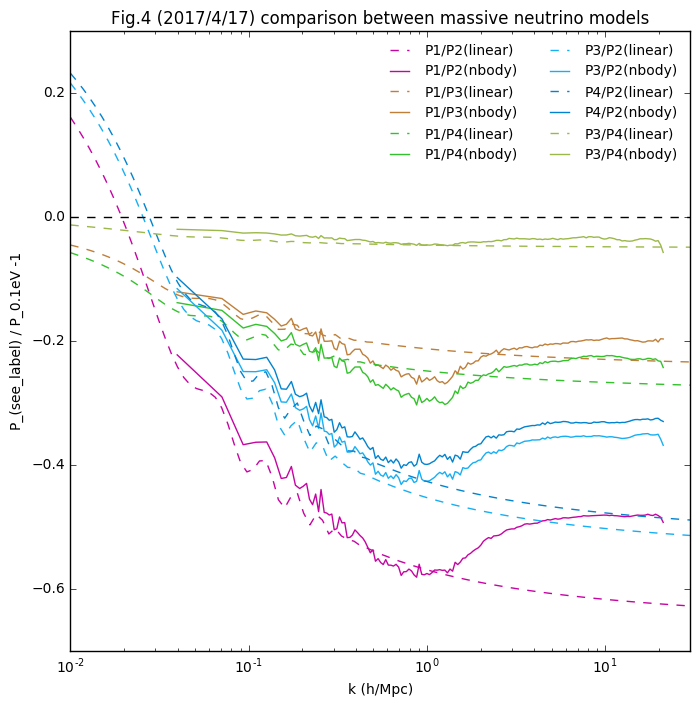

In [53]:
import itertools
f=figure(figsize=(8,8))
ax=f.add_subplot(111)
seed(10)
models = ['mnv0.06522_om0.28205_As1.8826','mnv0.06271_om0.38154_As2.2004','mnv0.10000_om0.30000_As2.1000', 'mnv0.00000_om0.30000_As2.1000']

def test_model (ifn):
    ikcamb, iPcamb = np.loadtxt('camb/camb_%s_matterpow_0.dat'%(ifn)).T
    iPcamb_interp = interp1d(ikcamb, iPcamb)(k_arr)
    kTF, Ttot, Tnn, Tnu = loadtxt('camb/camb_%s_transfer_0.dat'%(ifn)).T[[0,6,7,5]]
    ratio_nn = interp1d(kTF, (Tnn/Ttot)**2)(k_arr)
    ratio_nu = interp1d(kTF, (Tnu/Ttot)**2)(k_arr)
    iPcamb_interp *= ratio_nn

    if ifn==models[-1]:
        iknb, iPnb, iN = np.loadtxt('matterpower/%s-PK-DM-snapshot_050_radiation'%(ifn)).T
    else:
        iknb, iPnb, iN = np.loadtxt('matterpower/%s-PK-DM-snapshot_050'%(ifn)).T
    iPnb *= Boxsize**3
    iPnb_bin = bin_array(iPnb, iN)
    return iPcamb_interp, iPnb_bin
Ptest_arr = [test_model(ifn) for ifn in models]

for iii in range(len(models)):
    print 'Model %i, %s'%(iii+1,models[iii])
for ix in itertools.combinations(range(4), 2):
    iii,jjj = ix
    if iii == 1:
        jjj, iii = ix
    iPcamb1, iPnb1 = Ptest_arr[iii]
    iPcamb2, iPnb2 = Ptest_arr[jjj]
    icolor=rand(3)
    ax.plot(k_arr,iPcamb1/iPcamb2-1,'--',lw=1, c=icolor,label='P%i/P%i(linear)'%(iii+1, jjj+1))
    ax.plot(knb_bin, iPnb1/iPnb2-1,'-',lw=1,c=icolor, label='P%i/P%i(nbody)'%(iii+1, jjj+1))

ax.legend(frameon=0,fontsize=10,loc=0,ncol=2)
ax.set_xscale('log')
ax.plot([1e-2, 30],[0,0],'k--')
ax.set_xlim(1e-2, 30)
#ax.set_ylim(-0.1,0)
ax.set_xlabel('k (h/Mpc)')
ax.set_ylabel('P_(see_label) / P_0.1eV -1')
ax.set_title('Fig.4 (2017/4/17) comparison between massive neutrino models')
show()